### 1.1 Load Libraries

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore') # To supress warnings

### 1.2. Import the dataset

In [306]:
new_data  = pd.read_csv('used_cars_data.csv') # Import the dataset named used_cars_data.csv
data = new_data.copy()
data.head()  # view the first 5 rows of the data


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [307]:
# We will go ahead and drop this column as we won't be using it
data.drop(['S.No.'],axis=1,inplace=True)

### 1.3 Check the Dimension of data

In [308]:
data.shape # Check the shape of the data

(7253, 13)

### Observation
- There are 7,253 rows and 13 columns in this dataset

### 1.4 Check the Information about the data

In [309]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) # Number of missing values in the data

,Number of missing values
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


### Observations
- There are 4 numerical variables and 9 object variables.


- 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Seats' variables would need to be converted to category datatype as they contain finite number of possible values. 


- Some variables in the dataset should be numerical variables. We would need to clean the data in these columns and convert it to the appropriate datatype.


- 'Mileage', 'Engine', 'Power', 'Seats','New_Price' and 'Price' variables have missing values and would need to be treated

### 1.5 Data Pre-Processing & Feature Engineering

In [311]:
# Extract vehicle brand name from Name column
data['Brand'] = data['Name'].str.split(' ').str[0]

#Merge duplicate row Isuzu and ISUZU
data.Brand[data.Brand=='Isuzu']='ISUZU'

# Check for unique values within Brand variable
#data.groupby('Brand').nunique()

# We will go ahead and drop the Name column as we won't be using it
data.drop(['Name'],axis=1,inplace=True)

In [312]:
# Create a dictionary with Location and Region Key-Value pairs
loc ={'Mumbai' : 'West', 'Hyderabad' : 'South', 'Kochi' : 'South', 'Coimbatore' : 'South', 
      'Pune' : 'West', 'Delhi' : 'North', 'Kolkata' : 'East', 'Chennai' : 'South', 'Jaipur' : 'North', 
      'Bangalore' : 'South', 'Ahmedabad' : 'West'} 

# Add a new column named 'Region' 
data['Region'] = data['Location'].map(loc) 

# We will go ahead and drop the Year column as we won't be using it anymore
data.drop(['Location'],axis=1,inplace=True)

In [313]:
#Convert object columns to category datatype
categories = ['Fuel_Type','Transmission', 'Owner_Type', 'Seats','Brand','Region']
data = data.apply(lambda col: col.astype('category') if col.name in categories else col)

In [314]:
# Split Mileage column and store values in New_Mileage Variable

s = data['Mileage'].str.split(n= 1, expand = True) # Split Mileage column
data['New_Mileage'] = s[0] #Store Mileage values in New_Mileage variable

data['New_Mileage']= data['New_Mileage'].astype('float') # Convert New_Mileage to float
data.drop(['Mileage'],axis=1,inplace=True) # Drop Measure and Mileage columns as they are no longer required

In [315]:
# Replace null bhp values in Power variable with NaN
data.loc[data['Power'].str.contains('null', case=False, na=False), 'Power'] = np.nan

In [316]:
# Function to take the number before a string
def obj_to_num(value):
    
    if isinstance(value, str):
        return float(value.split()[0])
    else:
        return np.nan

num_cols = ['Engine', 'Power','New_Price']

for colname in num_cols:    
    data[colname] = data[colname].apply(obj_to_num)

In [317]:
# Bin Year variable to create Manufacturing_Period variable
data['Manufacturing_Period']= pd.cut(data.Year,bins=[1995,1999,2009,2019],labels=["1990's","2000's","2010's"])

# We will go ahead and drop the Year column as we won't be using it anymore
data.drop(['Year'],axis=1,inplace=True)

In [318]:
data.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Brand,Region,New_Mileage,Manufacturing_Period
0,72000,CNG,Manual,First,998.0,58.16,5.0,NaN,1.75,Maruti,West,26.60,2010's
1,41000,Diesel,Manual,First,1582.0,126.20,5.0,NaN,12.50,Hyundai,West,19.67,2010's
2,46000,Petrol,Manual,First,1199.0,88.70,5.0,8.61,4.50,Honda,South,18.20,2010's
3,87000,Diesel,Manual,First,1248.0,88.76,7.0,NaN,6.00,Maruti,South,20.77,2010's
4,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,NaN,17.74,Audi,South,15.20,2010's


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Kilometers_Driven     7253 non-null   int64   
 1   Fuel_Type             7253 non-null   category
 2   Transmission          7253 non-null   category
 3   Owner_Type            7253 non-null   category
 4   Engine                7207 non-null   float64 
 5   Power                 7078 non-null   float64 
 6   Seats                 7200 non-null   category
 7   New_Price             1006 non-null   float64 
 8   Price                 6019 non-null   float64 
 9   Brand                 7253 non-null   category
 10  Region                7253 non-null   category
 11  New_Mileage           7251 non-null   float64 
 12  Manufacturing_Period  7253 non-null   category
dtypes: category(7), float64(5), int64(1)
memory usage: 392.3 KB


### 1.6 Descriptive Analysis of Quantitative Variables

In [320]:
data.describe() # Five(5) number summary of the quantitative variables

,Kilometers_Driven,Engine,Power,New_Price,Price,New_Mileage
count,7.253000e+03,7207.000000,7078.000000,1006.000000,6019.000000,7251.000000
mean,5.869906e+04,1616.573470,112.765214,19.894324,9.479468,18.141580
std,8.442772e+04,595.285137,53.493553,19.813947,11.187917,4.562197
min,1.710000e+02,72.000000,34.200000,1.000000,0.440000,0.000000
25%,3.400000e+04,1198.000000,75.000000,7.635000,3.500000,15.170000
50%,5.341600e+04,1493.000000,94.000000,11.270000,5.640000,18.160000
75%,7.300000e+04,1968.000000,138.100000,23.640000,9.950000,21.100000
max,6.500000e+06,5998.000000,616.000000,99.920000,160.000000,33.540000


In [321]:
data.describe(exclude=[np.number]) # Descriptive analysis of the qualitative variables

,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Region,Manufacturing_Period
count,7253,7253,7253,7200.0,7253,7253,7253
unique,5,2,4,9.0,32,4,3
top,Diesel,Manual,First,5.0,Maruti,South,2010's
freq,3852,5204,5952,6047.0,1444,3451,6396


In [322]:
# Function to Calculate the Coefficient of Variation
def coef_var(col):
    return round(col.std()/col.mean(), 3)

In [323]:
eng= coef_var(data['Engine'])
print('The coefficient of variation for Engine is :' , eng, '%' )

The coefficient of variation for Engine is : 0.368 %


In [324]:
po= coef_var(data['Power'])
print('The coefficient of variation for Power is :' , po, '%' )

The coefficient of variation for Power is : 0.474 %


In [325]:
nepr= coef_var(data['New_Price'])
print('The coefficient of variation for New_Price is :' , nepr, '%' )

The coefficient of variation for New_Price is : 0.996 %


In [326]:
pri= coef_var(data['Price'])
print('The coefficient of variation for Price is :' , pri, '%' )

The coefficient of variation for Price is : 1.18 %


In [327]:
kmd = coef_var(data['Kilometers_Driven'])
print('The coefficient of variation for Kilometers_Driven is :' , kmd, '%' )

The coefficient of variation for Kilometers_Driven is : 1.438 %


In [328]:
newmi = coef_var(data['New_Mileage'])
print('The coefficient of variation for New_Mileage is :' , newmi, '%' )

The coefficient of variation for New_Mileage is : 0.251 %


### Observations 

The five number summary helps describe the centre, spread and shape of the data

- The mean of Kilometers_Driven is greater than the median and the mean of New_Mileage is less than the median which suggests a slight right skewed and left skewed distribution respectively. 


- The coefficient of variation lets us know how spread out values are in relation to the mean. Price and Kilometers_Driven have CVs greater than 100% which suggests that the data is widely spread. There may be outliers within these variables.


-  These assumptions would be validated later in this project

### 1.7 Exploratory Data Analysis (Univariate Analysis)

In [329]:
# Function to create Histogram and Boxplot Visualizations
def hist_box(variable, bins, xlabel):
    plt.figure(figsize=(8,5)) # set the figure size
    sns.distplot(variable, bins=bins) # Plot the histogram

    plt.axvline(variable.mean(),color='green',label='Mean') # Draw lines on the plot for mean and median of the variable
    plt.axvline(variable.median(),color='blue',label='Median')

    plt.xlabel(xlabel) # label the x-axis
    plt.ylabel('Frequency') # label the y-axis
    plt.legend() # Plot the legend
    plt.title('Measure of Central Tendency and Dispersion') # Display plot title
    plt.show() # Display Plot
    
    plt.figure(figsize=(8,5)) # set the figure size
    sns.boxplot(variable) # Plot BoxPlot

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Kilometers_Driven)

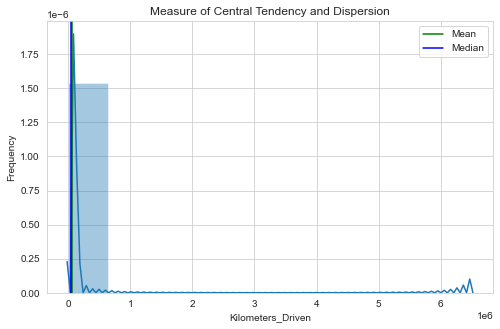

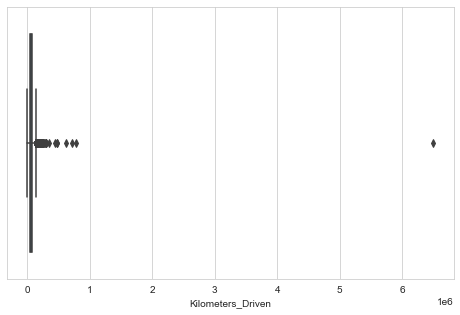

In [330]:
hist_box(data['Kilometers_Driven'], 10, 'Kilometers_Driven')

### Observation
1. There are outliers within this variable. 
2. This feature is highly skewed. We will go ahead an d transform this variable to improve its behaviour

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Engine)

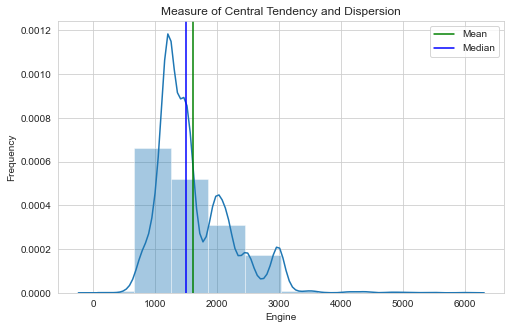

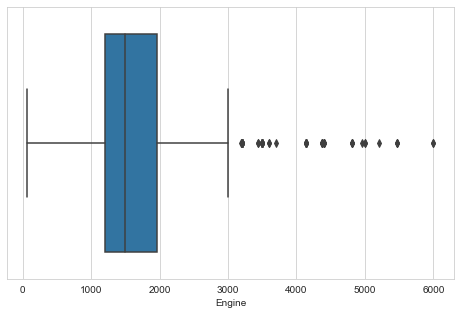

In [331]:
hist_box(data['Engine'], 10, 'Engine')

### Observation
1. This variable has a right skewed distribution. We would have to confirm if these outliers have a negative impact on the model. 

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Power)

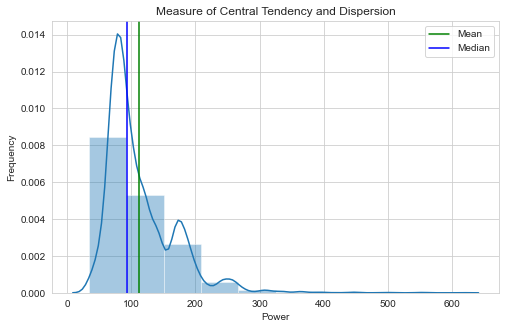

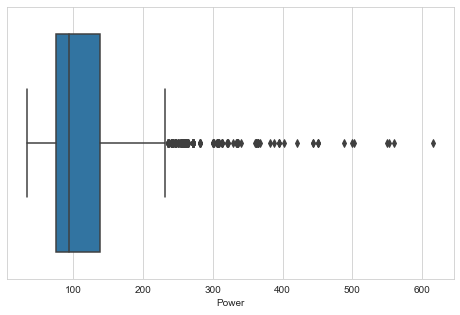

In [332]:
hist_box(data['Power'], 10, 'Power')

### Observation
1. This variable has a right skewed distribution. We would have to confirm if these outliers have a negative impact on the model. 

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Price)

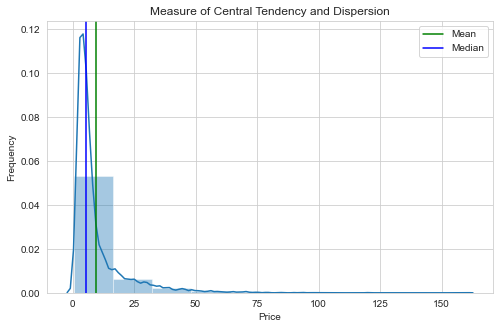

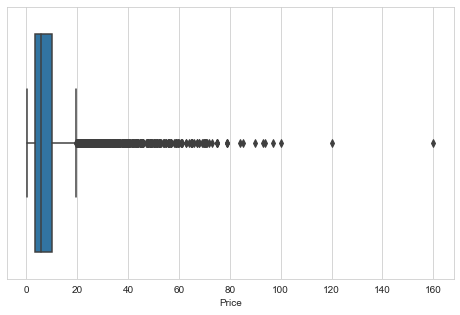

In [333]:
hist_box(data['Price'], 10, 'Price')

### Observation
1. There are outliers within this variable. 
2. This feature is highly skewed and will behave better if transformed. Since it is right-skewed, we will transform this variable using the log transformation method

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (New_Mileage)

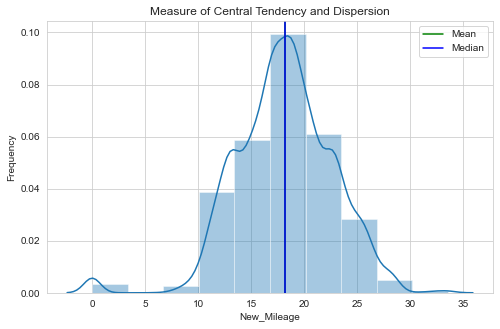

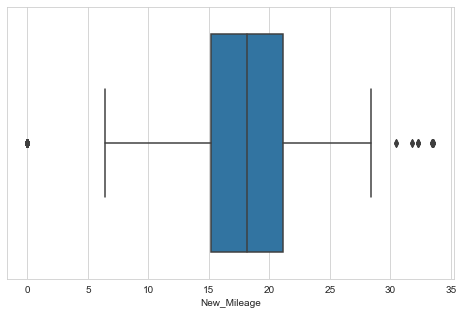

In [334]:
hist_box(data['New_Mileage'], 10, 'New_Mileage')

### Observation 
1. This variable has a left skewed distribution. We would have to confirm if these outliers have a negative impact on the model. 

In [335]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

###  Visualization of Categorical Variables Using Barplot (Region)

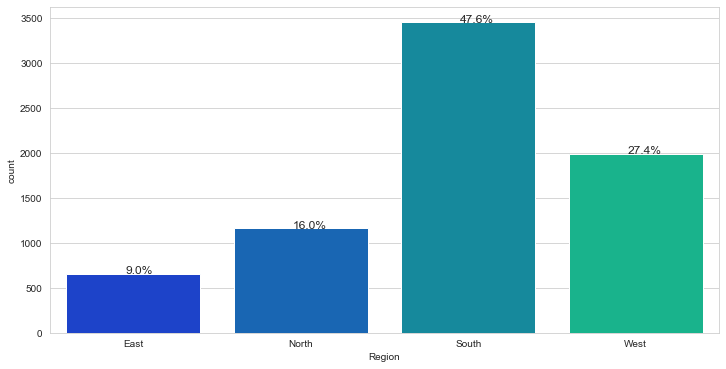

In [336]:
# Plot barplot for Location Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Region'],palette='winter')
perc_on_bar(ax,data['Region'])

### Observation
1. Cars were sold the most in Southern regions (47.6%)

###  Visualization of Categorical Variables Using Barplot (Fuel_Type)

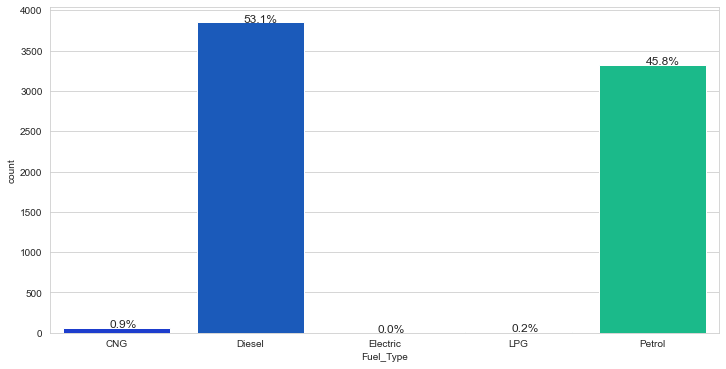

In [337]:
# Plot barplot for Fuel_Type Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Fuel_Type'],palette='winter')
perc_on_bar(ax,data['Fuel_Type'])

### Observation
1. Most cars available for sale use either Diesel (53.1%) or Petrol (45.9%) fuel type. 
2. A combined 1.1% of vehicles use gas based fuels

###  Visualization of Categorical Variables Using Barplot (Transmission)

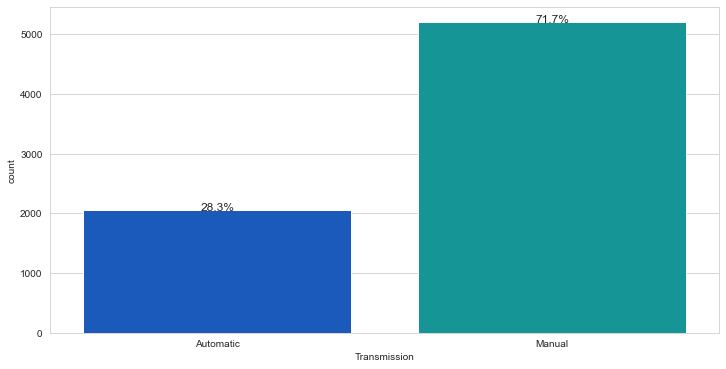

In [338]:
# Plot barplot for Transmission Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Transmission'],palette='winter')
perc_on_bar(ax,data['Transmission'])

### Observation
1. 71.8% of used cars available on the market make use of a manual transmission

###  Visualization of Categorical Variables Using Barplot (Owner_Type)

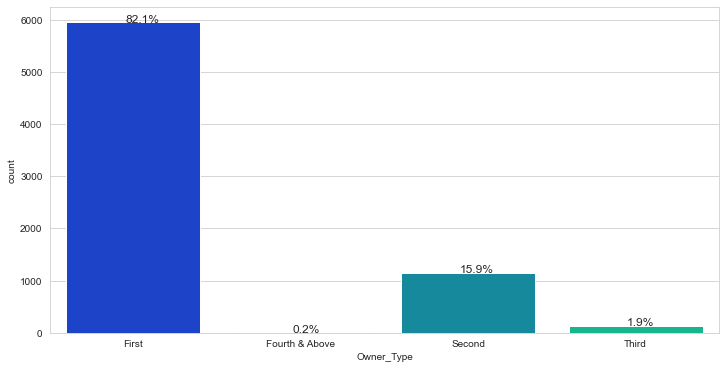

In [339]:
# Plot barplot for Owner_Type Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Owner_Type'],palette='winter')
perc_on_bar(ax,data['Owner_Type'])

### Observation
1. A large percentage (82.1%) of used cars previously belonged to just 1 owner. 

###  Visualization of Categorical Variables Using Barplot (Seats)

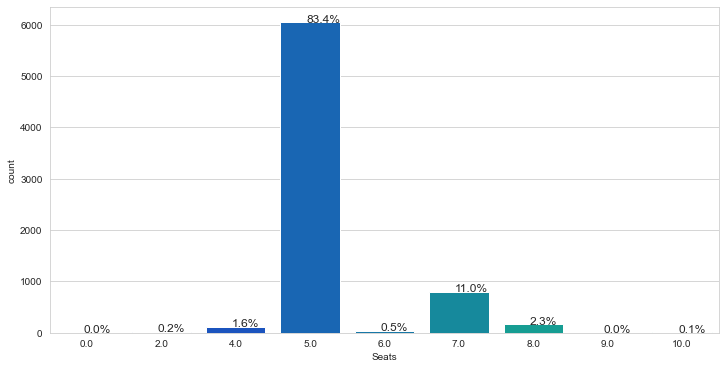

In [340]:
# Plot barplot for Seats Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Seats'],palette='winter')
perc_on_bar(ax,data['Seats'])

### Observation
1. Most used cars available for sale are 5 seaters (83.4%)   

###  Visualization of Categorical Variables Using Barplot (Manufacturing_Period)

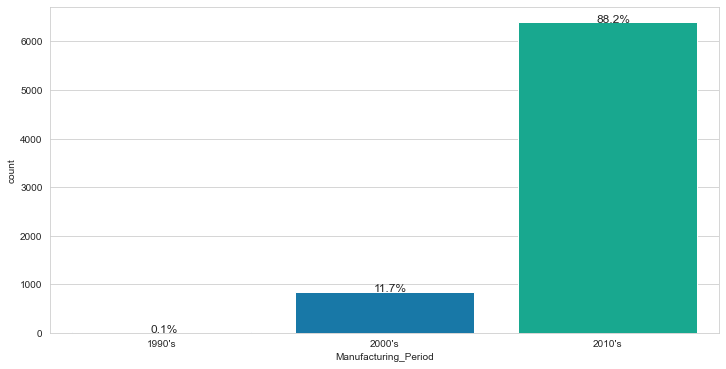

In [341]:
# Plot barplot for Manufacturing_Period Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Manufacturing_Period'],palette='winter')
perc_on_bar(ax,data['Manufacturing_Period'])

### Observation
1. Most used cars were manufactured within the 2010s (88.2%) decade

### 1.8 Outliers Treatment

In [342]:
# Kilometers_Driven Outlier Treatment
data['Kilometers_Driven'].replace(data[data['Kilometers_Driven'] > 300000]['Kilometers_Driven'].values,np.nan, inplace = True)

# Price Outlier Treatment
data['Price'].replace(data[data['Price'] > 80]['Price'].values, np.nan, inplace = True)
data['Price'].replace(data.loc[3132]['Price'], np.nan, inplace = True)

# New_Mileage Outlier Treatment
data['New_Mileage'].replace(data[data['New_Mileage'] <= 0]['New_Mileage'].values , np.nan, inplace = True)

# New_Mileage Outlier Treatment
data['Engine'].replace(data[data['Engine'] < 600]['Engine'].values , np.nan, inplace = True)

### Observation

1. To treat the outliers in Kilometers_Driven, the values greater than 300,000 within the variable were considered as outliers and converted to NaN values. 300,000 was chosen as it is very rare to find vehicles that have been driven for over 300,000 km



2.  To treat the outliers in Price, the values greater than 80 within the variable were considered as outliers and converted to NaN values.  They were considered outliers after comparing the features of the vehicles with almost identical vehicles within the dataset. I came to a conclusion that the price charged for vehicles of that Brand, Power, Mileage and Engine capacity should not be as high as that



3.  To treat the outliers in New_Mileage, the values less or equal to zero within the variable were considered as outliers and converted to NaN values. It is impossible to have a vehicle with a Mileage potential of zero and so I considered those values as outliers.



### 1.9 Missing Values Treatment

In [343]:
# Sum and Percentage of Missing Values
null_sum = data.isnull().sum()# instantiate columns for missing data
total = null_sum.sort_values(ascending=False)
percent = (((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False) # Percentage of missing values
print(percent)

New_Price               86.13
Price                   17.15
Power                    2.41
New_Mileage              1.14
Seats                    0.73
Engine                   0.65
Kilometers_Driven        0.11
Manufacturing_Period     0.00
Region                   0.00
Brand                    0.00
Owner_Type               0.00
Transmission             0.00
Fuel_Type                0.00
dtype: float64


In [344]:
# counting the number of missing values per row
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

1    5202
2    1127
0     815
3      57
4      31
5      20
6       1
dtype: int64

### Observation

- The New_Price column has 86.13% of its data missing. This column will be dropped as it has a vast majority of its data missing


- We would use KNN algorithm to fill numerical missing values


- We would replace missing values in the Seats column with the string 'unknown'


In [345]:
# Drop New_Price column 
data.drop(['New_Price'], axis=1, inplace=True) 

In [346]:
# Replace NaN values with Unknown
data['Seats'] = data['Seats'].astype(str).replace('nan', 'Unknown').astype('category')

In [347]:
#Fill NAN values using K-Nearest Neighbor Algorithm

num = [col for col in data.columns if data[col].dtypes == 'float']
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
imputer.fit(data[num])
missing = imputer.transform(data[num])

#Assign columns to new DataFrame
k = pd.DataFrame(data=missing,columns=['Kilometers_Driven','Engine', 'Power', 'Price','New_Mileage'])
data = pd.concat([k,pd.DataFrame(data=data,columns=['Fuel_Type','Transmission', 'Owner_Type',
                                                           'Seats', 'Brand',
                                                           'Region', 'Manufacturing_Period'])],axis=1)

### 2.0 Transformation

In [348]:
# Transform Price, Power and Engine Variables using log transformation and Kilometers_Driven using Square root transformation
cols_to_log = ['Price','Power','Engine']

for colname in cols_to_log:
    data[colname + '_log'] = np.log(data[colname])
data.drop(cols_to_log, axis=1, inplace=True)


cols_to_sqrt = ['Kilometers_Driven']

for colname in cols_to_sqrt:
    data[colname + '_sqrt'] = np.sqrt(data[colname])
data.drop(cols_to_sqrt, axis=1, inplace=True)



### 2.1 Exploratory Data Analysis (Bivariate Analysis)

###  HeatMap and PairPlot

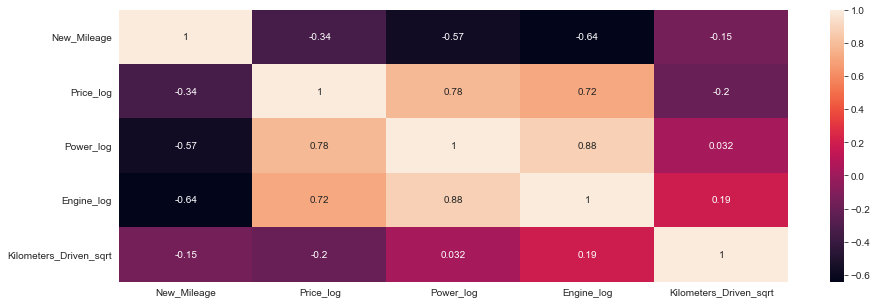

In [349]:
# Diaplay Heatmap of numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

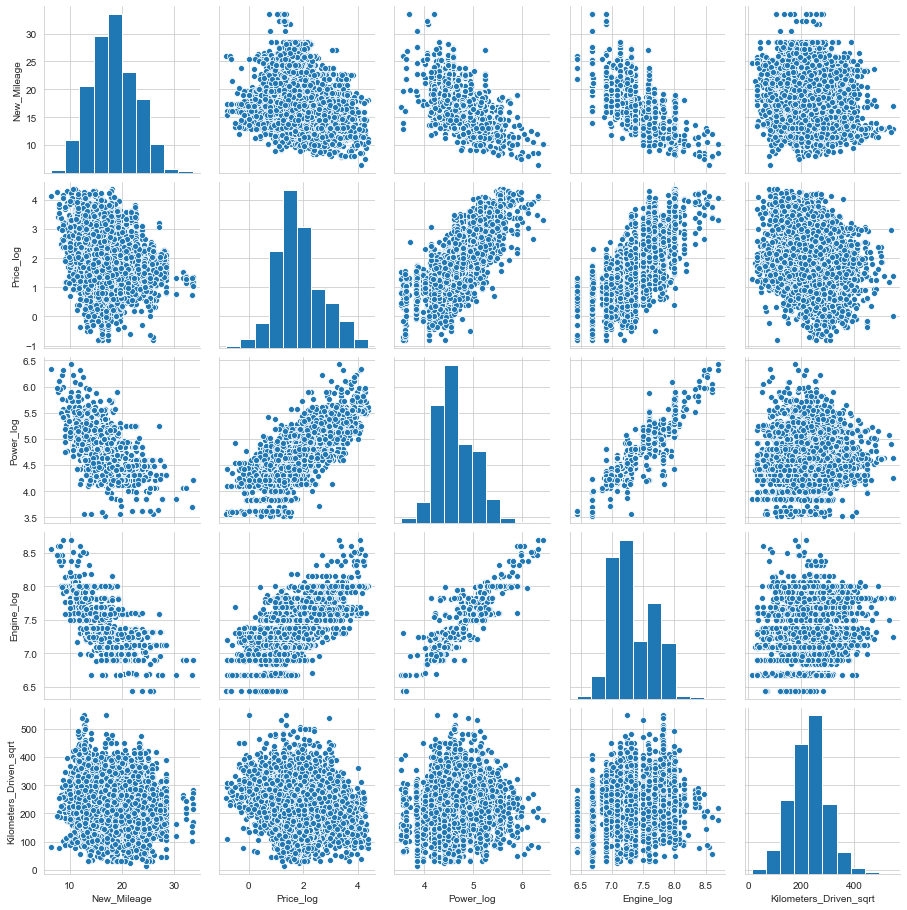

In [350]:
# Display pairplot of all numerical variables
sns.pairplot(data=data)
plt.show()

### Observations

- From the data, we can see that engine's capacity plays an important role in determining various engine outputs such as power and New_mileage. The higher the displacement volume of the engine, the higher the maximum power the engine can generate. Which in simple language means, the bigger the engine, the more powerful the car. This conseqently has an impact on mileage as more powerful vehicles are less fuel efficient which means the distance the car can travel(miles) per gallon of fuel reduces. This is supported by the data as we can see that both Engine and Power have a negative relationship with New_Mileage. 

- From the data, we can see that there is also a positive relationship between Price and both Engine and Power. The bigger and more powerful the engine, the more expensive the car is.

- An assumption of linear regression is the linearity of the relationship with the dependent variable. From our data just engine and power have a linear relationship with our dependent variable (Price). There is some relationship between Price and other variables but it is not very strong

###  Region vs Price

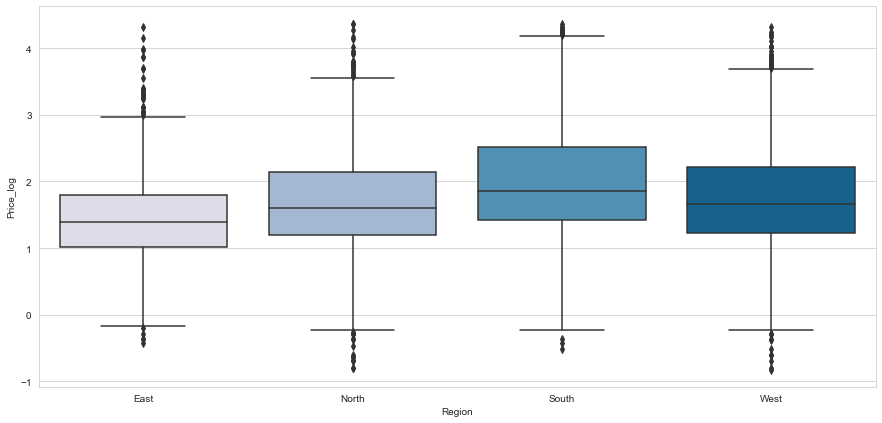

In [351]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["Region"],data["Price_log"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observations
1. As earlier stated, prices were highest in the southern regions

###  Fuel_Type vs Price

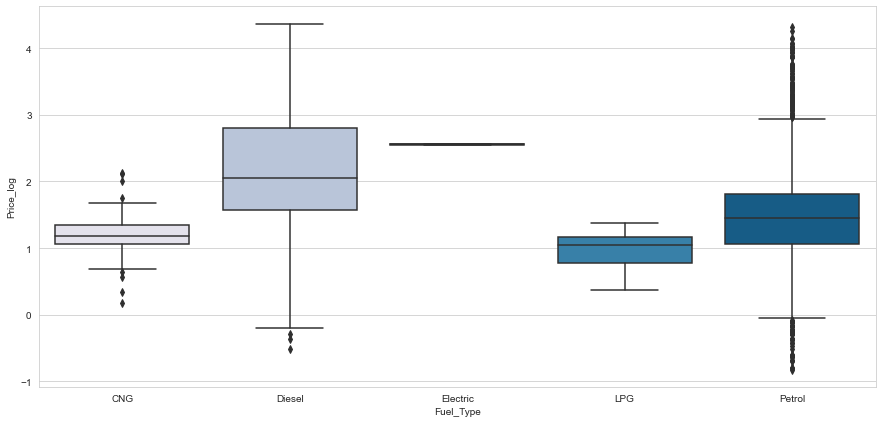

In [352]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["Fuel_Type"],data["Price_log"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observations
1. Cars that make use of diesel cost a lot more than other fuel types. 

### Transmission vs Price

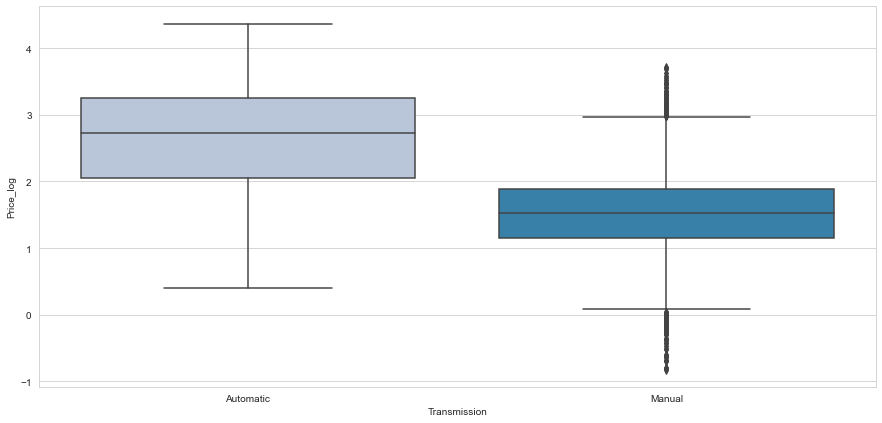

In [353]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["Transmission"],data["Price_log"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observation
- The price of used cars with Automatic transmissions is more expensive than that of Manual transmissions

### Owner_Type vs Price

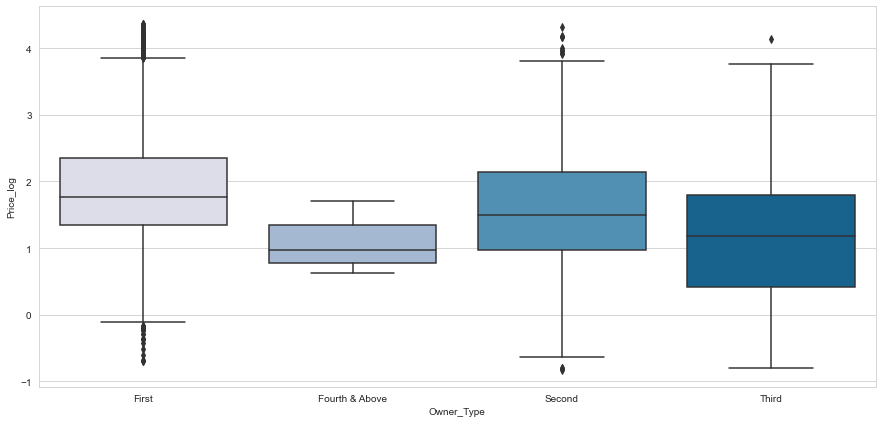

In [354]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["Owner_Type"],data["Price_log"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observation
- Cars that have had 1 or 2 owners are priced higher than cars with more than 2 owners

### Manufacturing_Period vs Price

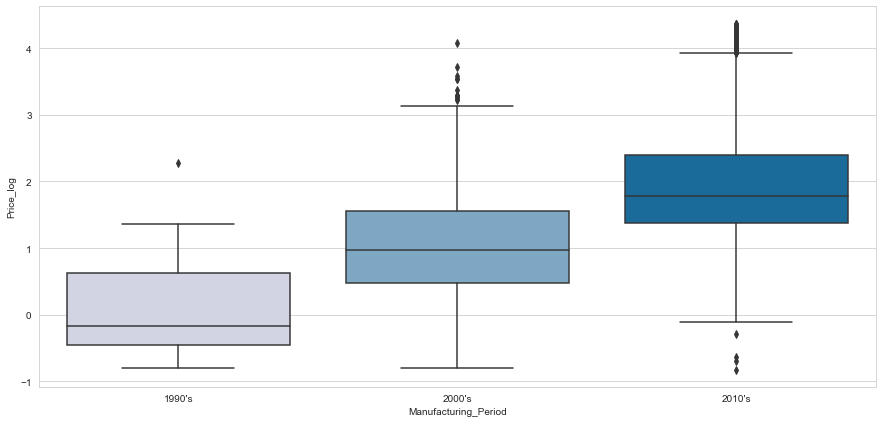

In [355]:
plt.figure(figsize=(15,7)) # Adjust size
sns.boxplot(data["Manufacturing_Period"],data["Price_log"],palette="PuBu") #Plot Boxplot
plt.show() #display plot

### Observations

- As expected, newer car models are more expensive than older car models

### 2.1 Exploratory Data Analysis (Multivariate Analysis)

### Transmission vs Engine vs Power

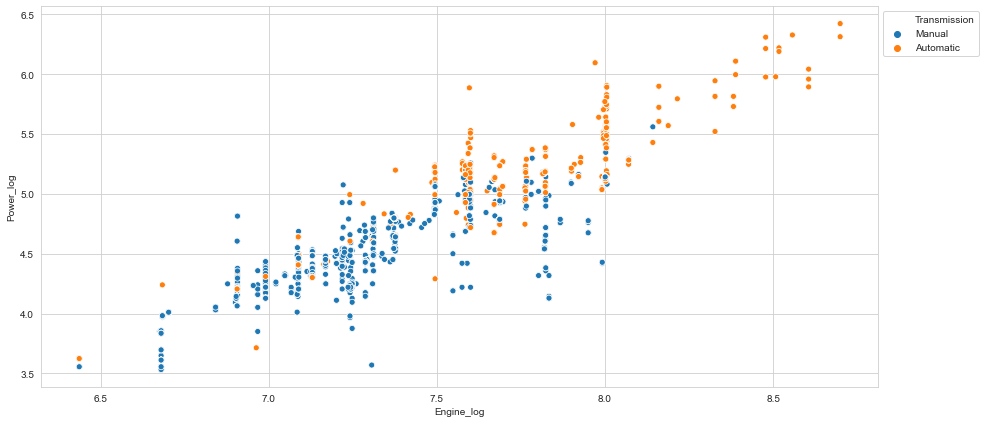

In [356]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Engine_log"],data["Power_log"],hue=data["Transmission"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation
- From the data, we can see that Automatic vehicles tend to have more Power and Engine capacity than Manual vehicles

### Fuel_Type vs Price vs Power

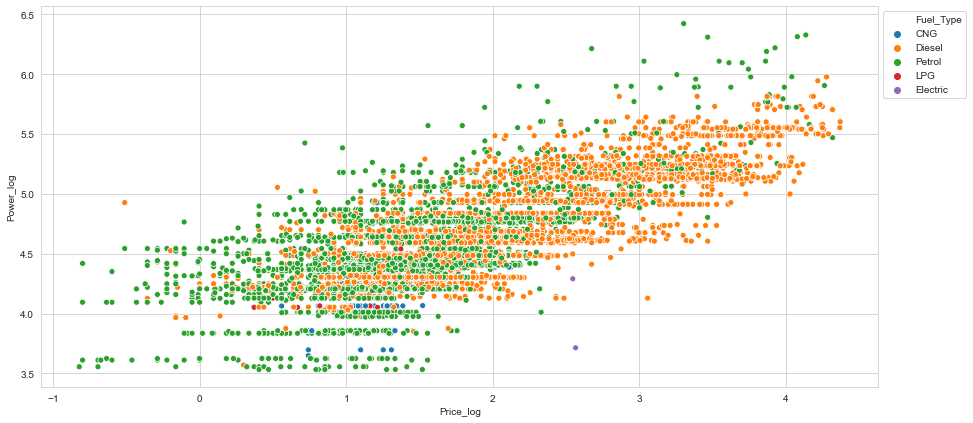

In [357]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Price_log"],data["Power_log"],hue=data["Fuel_Type"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation
- This is an interesting observation as we can see that the higher priced cars primarily make use of diesel engines while the lower priced cars are use fuel.

- Also interesting to note is that high priced cars with high power  tend to make use of petrol engines

### Manufacturing_Period vs Price vs Power

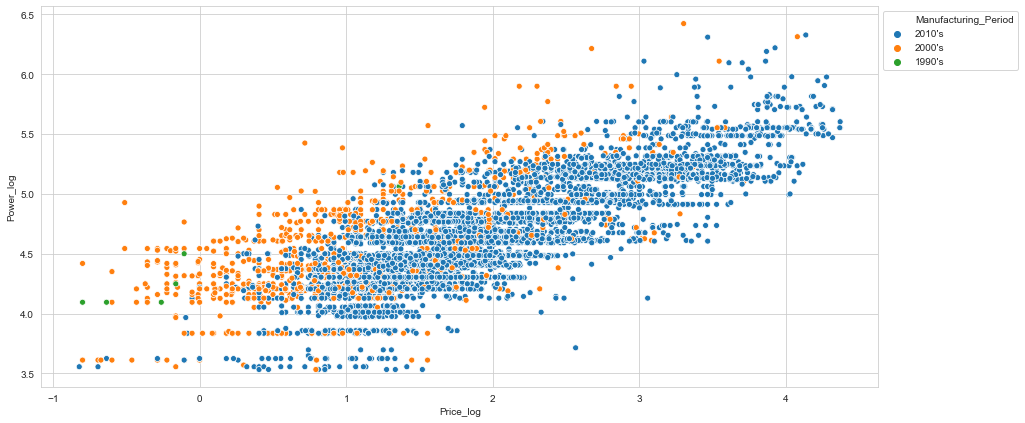

In [358]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Price_log"],data["Power_log"],hue=data["Manufacturing_Period"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation
- We can see from the data that cars with high prices and high power were manufactured mainly in 2010s. 

- Lower priced cars were manufactured mainly in the 2000s and generally have less power

### Fuel_Type vs Engine vs New_Mileage

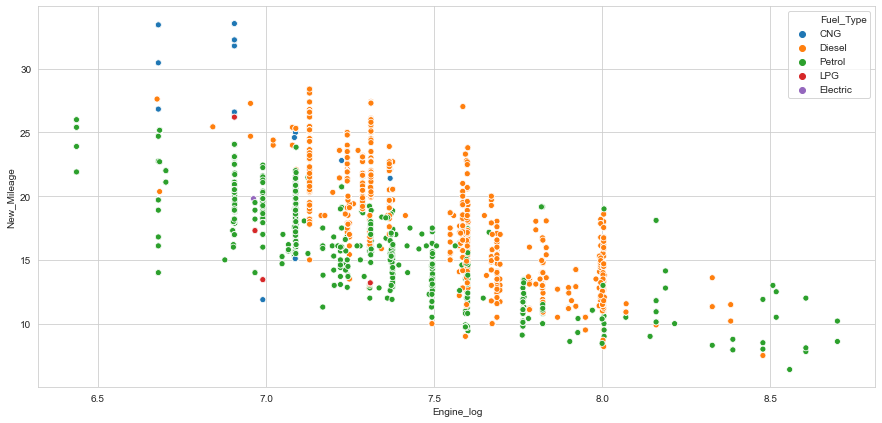

In [359]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Engine_log"],data["New_Mileage"],hue=data["Fuel_Type"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation

- Diesel Engines have very good mileage. They however do not have a high engine capacity

### Transmission vs Engine vs New_Mileage

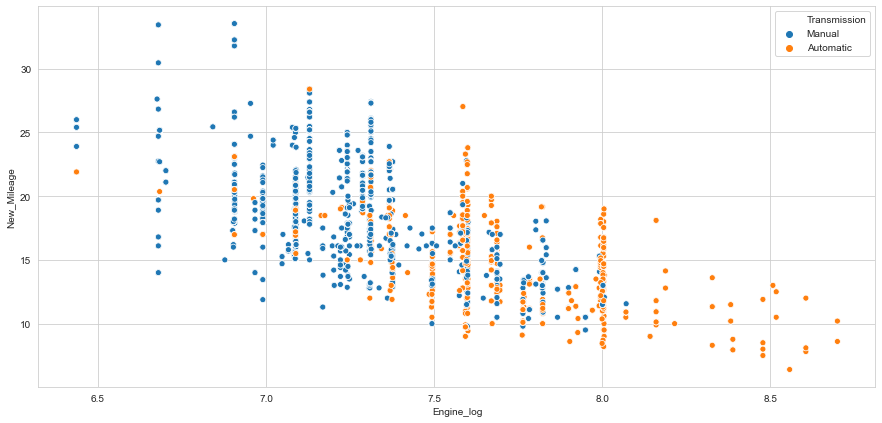

In [360]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Engine_log"],data["New_Mileage"],hue=data["Transmission"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation

- Automatic transmission cars have a high engine capacity. They however have low mileage compared to Manual transmission vehicles which have low engine capacity but very high mileage. 

### Manufacturing_Period vs Engine vs New_Mileage

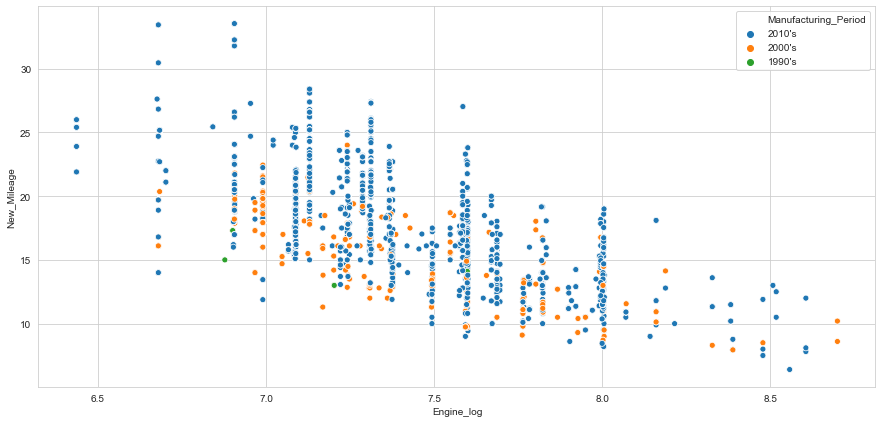

In [361]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Engine_log"],data["New_Mileage"],hue=data["Manufacturing_Period"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot

### Observation

- From the data we can observe that vehicles manufactured in the 2010s have low engine capacity. As earlier stated, there is a negative relationship between Engine and New_Mileage. As a result, vehicles manufactured in 2010s tend to have a high Mileage

### Brand vs Engine, Power and New_Mileage

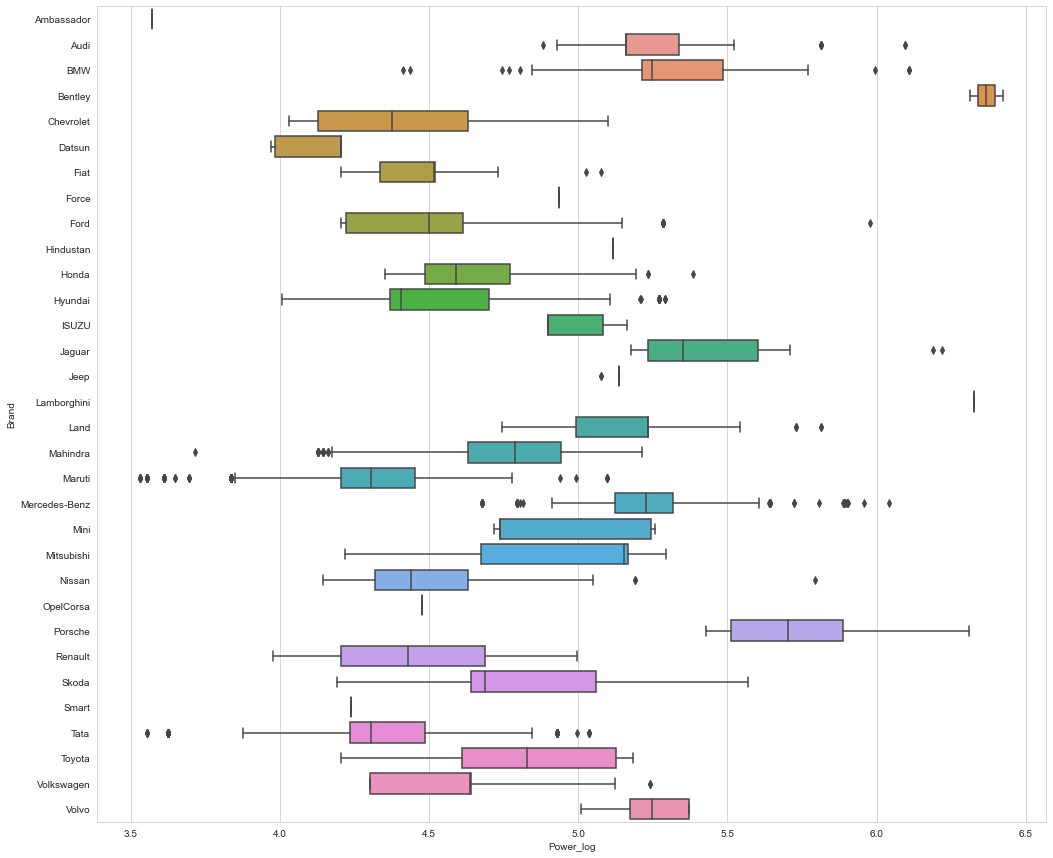

In [362]:
plt.figure(figsize=(17,15))
sns.boxplot(y='Brand',x="Power_log",data=data)
plt.show()

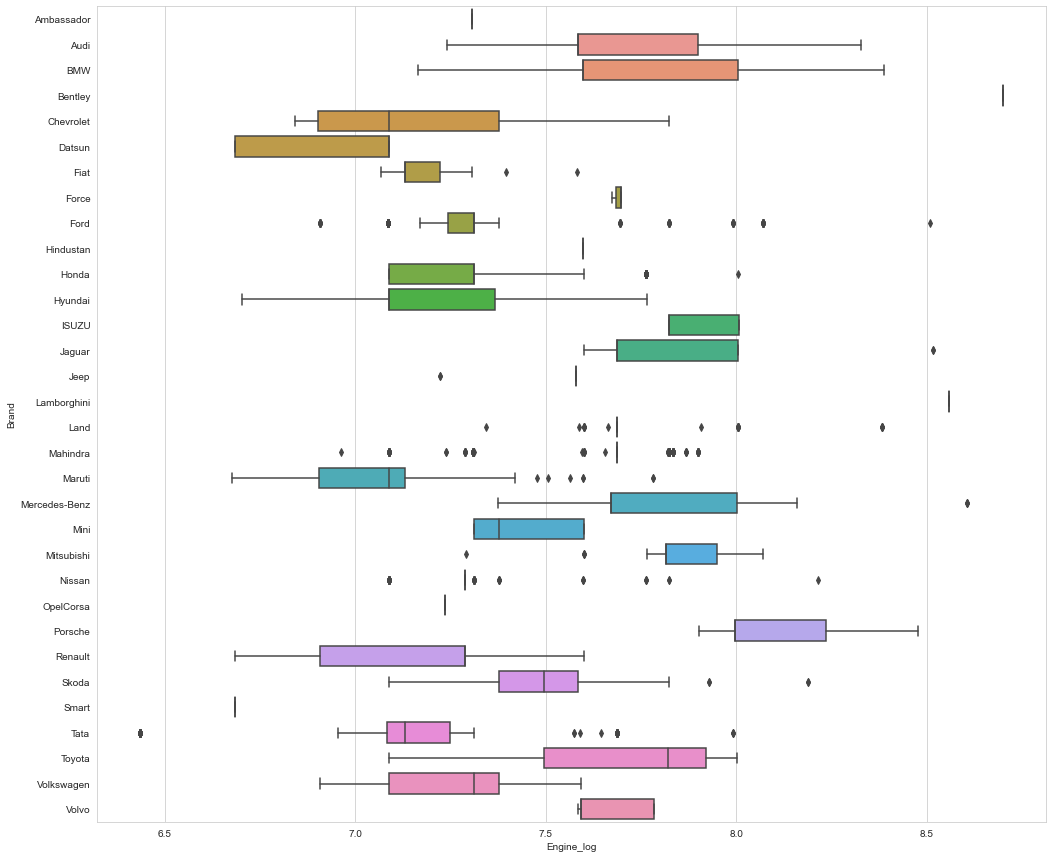

In [363]:
plt.figure(figsize=(17,15))
sns.boxplot(y='Brand',x="Engine_log",data=data)
plt.show()

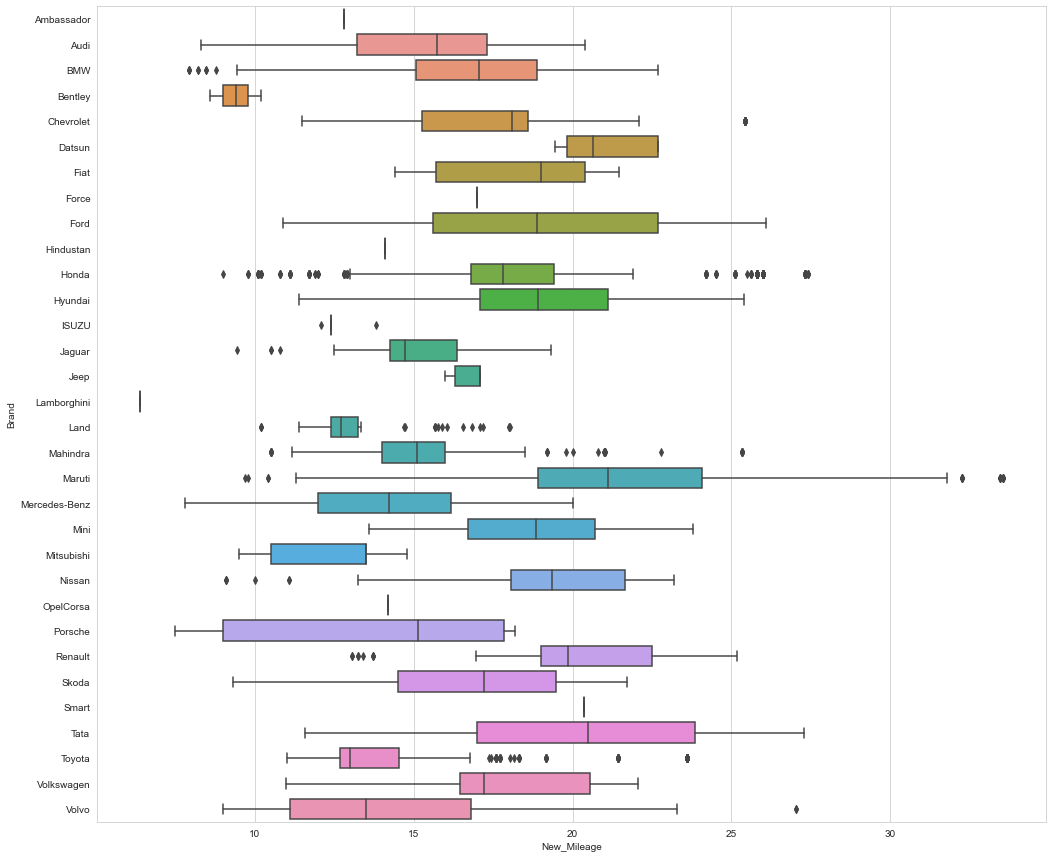

In [364]:
plt.figure(figsize=(17,15))
sns.boxplot(y='Brand',x="New_Mileage",data=data)
plt.show()

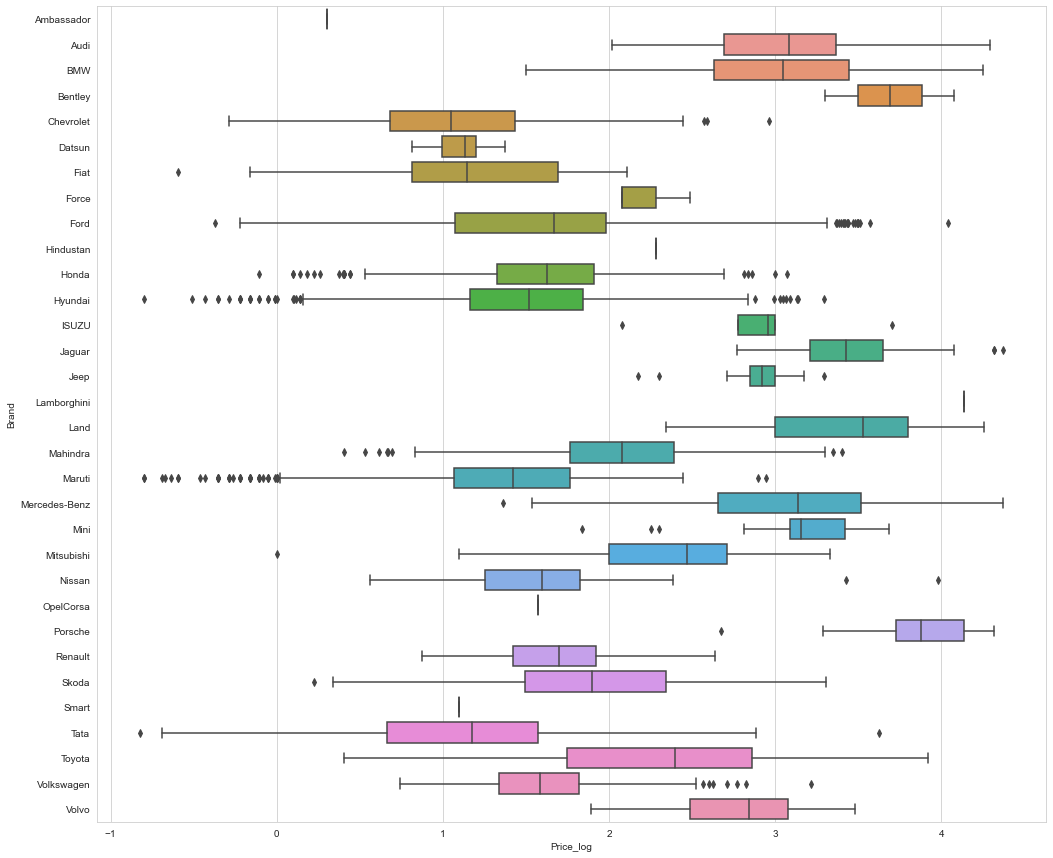

In [365]:
plt.figure(figsize=(17,15))
sns.boxplot(y='Brand',x="Price_log",data=data)
plt.show()

### Observation

- From the 4 plots above, we can see that high-end brands like Bentley, Porsche and Lamborghini are highly priced relative to the other brands, have high engine capacities and high power. Consequently, their mileage is significantly less than the Maruti brand which has low engine capacity and power

### 2.2 Split data into dependent and independent variables

In [366]:
data.head()

,New_Mileage,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Region,Manufacturing_Period,Price_log,Power_log,Engine_log,Kilometers_Driven_sqrt
0,26.60,CNG,Manual,First,5.0,Maruti,West,2010's,0.559616,4.063198,6.905753,268.328157
1,19.67,Diesel,Manual,First,5.0,Hyundai,West,2010's,2.525729,4.837868,7.366445,202.484567
2,18.20,Petrol,Manual,First,5.0,Honda,South,2010's,1.504077,4.485260,7.089243,214.476106
3,20.77,Diesel,Manual,First,7.0,Maruti,South,2010's,1.791759,4.485936,7.129298,294.957624
4,15.20,Diesel,Automatic,Second,5.0,Audi,South,2010's,2.875822,4.947340,7.584773,201.668044


In [367]:
#Defining X and y variables
X = data.drop(['Price_log'], axis=1) # Independent Variables
y = data[['Price_log']] # Dependent Variables

print(X.head())
print(y.head())

   New_Mileage Fuel_Type Transmission Owner_Type Seats    Brand Region  \
0        26.60       CNG       Manual      First   5.0   Maruti   West   
1        19.67    Diesel       Manual      First   5.0  Hyundai   West   
2        18.20    Petrol       Manual      First   5.0    Honda  South   
3        20.77    Diesel       Manual      First   7.0   Maruti  South   
4        15.20    Diesel    Automatic     Second   5.0     Audi  South   

  Manufacturing_Period  Power_log  Engine_log  Kilometers_Driven_sqrt  
0               2010's   4.063198    6.905753              268.328157  
1               2010's   4.837868    7.366445              202.484567  
2               2010's   4.485260    7.089243              214.476106  
3               2010's   4.485936    7.129298              294.957624  
4               2010's   4.947340    7.584773              201.668044  
   Price_log
0   0.559616
1   2.525729
2   1.504077
3   1.791759
4   2.875822


In [368]:
# Print shape of independent and dependent variable
print(X.shape)
print(y.shape)

(7253, 11)
(7253, 1)


### 2.3 Standardize/Normalize Continuous Variables

In [369]:
# Normalize Continous variables using Z-Score
std_scaler = StandardScaler()

X[['Kilometers_Driven_sqrt','Power_log','Engine_log']] = std_scaler.fit_transform(X[['Kilometers_Driven_sqrt', 
                                                                                     'Power_log','Engine_log']])

### 2.4 Encoding Categorical Columns

In [370]:
# Get dummies for categorical variables
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type','Manufacturing_Period','Seats','Brand','Region'], drop_first=True)
X.head()

,New_Mileage,Power_log,Engine_log,Kilometers_Driven_sqrt,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Region_North,Region_South,Region_West
0,26.60,-1.377716,-1.261891,0.562236,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,19.67,0.500832,0.110837,-0.380702,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,18.20,-0.354230,-0.715144,-0.208972,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20.77,-0.352590,-0.595794,0.943594,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,15.20,0.766299,0.761391,-0.392395,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 2.5 Split Data into Train and Test 

In [371]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.6 Model Building

In [372]:
# Initialize Model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)                                  

# Check Trained Model y-intercept
print("Intercept of the linear equation:", lr.intercept_) 

# Check Trained Model Coefficients
print("\nCofficients of the equation are:", lr.coef_)


pred = lr.predict(X_test) 

Intercept of the linear equation: [0.61720384]

Cofficients of the equation are: [[ 6.51950702e-03  3.13193764e-01  1.42089200e-01 -1.77991509e-01
   1.46918405e-01  1.09888865e+00 -1.05332592e-01 -6.70608159e-02
  -1.50970966e-01  2.11789950e-03 -1.31744154e-01 -2.81494540e-01
   6.75642677e-01  1.17192945e+00  2.54947061e-01 -1.41095569e-01
  -6.71231139e-02 -9.31413792e-02  1.43464697e-01  1.47732202e-01
   1.39065745e-01 -1.26914388e-01  8.89645015e-05  2.50233974e-01
   1.74598989e-01  5.94200585e-01 -5.34954690e-01 -4.31643671e-01
  -3.75362585e-01 -3.75934685e-01 -2.78483723e-01  4.05231404e-15
  -2.52734156e-01 -2.17359889e-01  4.19569535e-01  2.72676510e-01
   1.75151863e-01  3.94257201e-01  6.43187933e-01 -3.73488775e-01
  -1.68917206e-01  2.88088671e-01  5.33891483e-01 -1.58027963e-01
  -2.78981982e-01  3.85017609e-01  4.57234116e-01 -1.89416610e-01
  -2.28099704e-01  1.11022302e-16 -5.10765173e-01  1.94283542e-02
  -2.85198067e-01  5.18320577e-02  2.12693461e-01  3.85548189

### Model Performance Evaluation

In [373]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.25914931324284374

### Observation 

The mean Mean Absolute Error (MAE) is a measure of the average magnitude of error generated by the regression model. It is obtained by calculating the absolute difference between the model predictions and the observed values.

A MAE of 0.25995280332299264 tells us the average size of our residuals

In [374]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

0.3407971992631997

### Observation 

The Root Mean Squared Error is the standard deviation of our residuals. A RMSE of 0.34723997004549473 provides an estimate of how large our models residuals are being dispersed

In [375]:
# R2 Squared on test data
r2_score(y_test, pred)

0.8380158762723993

Let us fine tune this model by dropping variables that are not significant to the performance of the model. This is an important step as a less complex model reduces the risk of overfitting. We will do this by using Stats Model to check the p-value of each variable. If the P-Value is > than 0.05(significance level), we drop the model. We will do this iteratively as P-value changes when variables are added or removed from the model.

In [376]:
# Lets us build linear regression model using statsmodel 

import statsmodels.api as sm

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     502.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                -1631.9
No. Observations:                5077   AIC:                             3374.
Df Residuals:                    5022   BIC:                             3733.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [377]:
X_train2 = X_train1.drop(['Owner_Type_Fourth & Above'], axis=1) # Drop insignificant Variable 

olsmod1 = sm.OLS(y_train, X_train2) # Train Model using stats model
olsres1 = olsmod1.fit() # Fit new model
print(olsres1.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     511.8
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                -1631.9
No. Observations:                5077   AIC:                             3372.
Df Residuals:                    5023   BIC:                             3725.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [378]:
X_train3 = X_train2.drop(['Seats_Unknown'], axis=1) # Drop insignificant Variable 

olsmod2 = sm.OLS(y_train, X_train3) # Train Model using stats model
olsres2 = olsmod2.fit() # Fit new model
print(olsres2.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     521.8
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                -1631.9
No. Observations:                5077   AIC:                             3370.
Df Residuals:                    5024   BIC:                             3716.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [379]:
X_train4 = X_train3.drop(['Seats_2.0'], axis=1) # Drop insignificant Variable 

olsmod3 = sm.OLS(y_train, X_train4) # Train Model using stats model
olsres3 = olsmod3.fit() # Fit new model
print(olsres3.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     532.0
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:46   Log-Likelihood:                -1632.6
No. Observations:                5077   AIC:                             3369.
Df Residuals:                    5025   BIC:                             3709.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [380]:
X_train5 = X_train4.drop(['Brand_Jeep'], axis=1) # Drop insignificant Variable 

olsmod4 = sm.OLS(y_train, X_train5) # Train Model using stats model
olsres4 = olsmod4.fit() # Fit new model
print(olsres4.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     532.0
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:46   Log-Likelihood:                -1632.6
No. Observations:                5077   AIC:                             3369.
Df Residuals:                    5025   BIC:                             3709.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [381]:
X_train6 = X_train5.drop(['Brand_BMW'], axis=1) # Drop insignificant Variable

olsmod5 = sm.OLS(y_train, X_train6) # Train Model using stats model
olsres5 = olsmod5.fit() # Fit new model
print(olsres5.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     542.7
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:46   Log-Likelihood:                -1632.6
No. Observations:                5077   AIC:                             3367.
Df Residuals:                    5026   BIC:                             3700.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [382]:
X_train7 = X_train6.drop(['Seats_9.0'], axis=1) # Drop insignificant Variable

olsmod6 = sm.OLS(y_train, X_train7) # Train Model using stats model
olsres6 = olsmod6.fit() # Fit new model
print(olsres6.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     553.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -1632.6
No. Observations:                5077   AIC:                             3365.
Df Residuals:                    5027   BIC:                             3692.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [383]:
X_train8 = X_train7.drop(['Brand_Hindustan'], axis=1) # Drop insignificant Variable

olsmod7 = sm.OLS(y_train, X_train8) # Train Model using stats model
olsres7 = olsmod7.fit() # Fit new model
print(olsres7.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     553.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -1632.6
No. Observations:                5077   AIC:                             3365.
Df Residuals:                    5027   BIC:                             3692.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [384]:
X_train9 = X_train8.drop(['Brand_OpelCorsa'], axis=1) # Drop insignificant Variable

olsmod8 = sm.OLS(y_train, X_train9) # Train Model using stats model
olsres8 = olsmod8.fit() # Fit new model
print(olsres8.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     565.5
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -1632.8
No. Observations:                5077   AIC:                             3364.
Df Residuals:                    5028   BIC:                             3684.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [385]:
X_train10 = X_train9.drop(['Fuel_Type_LPG'], axis=1)  # Drop insignificant Variable

olsmod9 = sm.OLS(y_train, X_train10) # Train Model using stats model
olsres9 = olsmod9.fit() # Fit new model
print(olsres9.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     577.5
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:48   Log-Likelihood:                -1633.3
No. Observations:                5077   AIC:                             3363.
Df Residuals:                    5029   BIC:                             3676.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [386]:
X_train11 = X_train10.drop(['Fuel_Type_Petrol'], axis=1)  # Drop insignificant Variable

olsmod10 = sm.OLS(y_train, X_train11) # Train Model using stats model
olsres10 = olsmod10.fit() # Fit new model
print(olsres10.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     590.1
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:48   Log-Likelihood:                -1633.7
No. Observations:                5077   AIC:                             3361.
Df Residuals:                    5030   BIC:                             3668.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [387]:
X_train12 = X_train11.drop(['Seats_4.0'], axis=1) # Drop insignificant Variable

olsmod11 = sm.OLS(y_train, X_train12) # Train Model using stats model
olsres11 = olsmod11.fit() # Fit new model
print(olsres11.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     603.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:48   Log-Likelihood:                -1633.8
No. Observations:                5077   AIC:                             3360.
Df Residuals:                    5031   BIC:                             3660.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [388]:
X_train13 = X_train12.drop(['Brand_Smart'], axis=1) # Drop insignificant Variable

olsmod12 = sm.OLS(y_train, X_train13) # Train Model using stats model
olsres12 = olsmod12.fit() # Fit new model
print(olsres12.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     603.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:48   Log-Likelihood:                -1633.8
No. Observations:                5077   AIC:                             3360.
Df Residuals:                    5031   BIC:                             3660.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [389]:
X_train14 = X_train13.drop(['Brand_Bentley'], axis=1) # Drop insignificant Variable

olsmod13 = sm.OLS(y_train, X_train14) # Train Model using stats model
olsres13 = olsmod13.fit() # Fit new model
print(olsres13.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     616.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:49   Log-Likelihood:                -1634.5
No. Observations:                5077   AIC:                             3359.
Df Residuals:                    5032   BIC:                             3653.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [390]:
X_train15 = X_train14.drop(['Brand_ISUZU'], axis=1) # Drop insignificant Variable

olsmod14 = sm.OLS(y_train, X_train15) # Train Model using stats model
olsres14 = olsmod14.fit() # Fit new model
print(olsres14.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     631.1
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:49   Log-Likelihood:                -1635.5
No. Observations:                5077   AIC:                             3359.
Df Residuals:                    5033   BIC:                             3647.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [391]:
X_train16 = X_train15.drop(['Brand_Jaguar'], axis=1)  # Drop insignificant Variable

olsmod15 = sm.OLS(y_train, X_train16) # Train Model using stats model
olsres15 = olsmod15.fit() # Fit new model
print(olsres15.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     645.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:50   Log-Likelihood:                -1636.5
No. Observations:                5077   AIC:                             3359.
Df Residuals:                    5034   BIC:                             3640.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [392]:
X_train17 = X_train16.drop(['Brand_Audi'], axis=1)  # Drop insignificant Variable

olsmod16 = sm.OLS(y_train, X_train17) # Train Model using stats model
olsres16 = olsmod16.fit() # Fit new model
print(olsres16.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     661.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:50   Log-Likelihood:                -1638.3
No. Observations:                5077   AIC:                             3361.
Df Residuals:                    5035   BIC:                             3635.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [393]:
X_train18 = X_train17.drop(['Seats_5.0'], axis=1) # Drop insignificant Variable

olsmod17 = sm.OLS(y_train, X_train18) # Train Model using stats model
olsres17 = olsmod17.fit() # Fit new model
print(olsres17.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     677.7
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:50   Log-Likelihood:                -1639.2
No. Observations:                5077   AIC:                             3360.
Df Residuals:                    5036   BIC:                             3628.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [394]:
X_train19 = X_train18.drop(['Brand_Lamborghini'], axis=1) # Drop insignificant Variable

olsmod18 = sm.OLS(y_train, X_train19) # Train Model using stats model
olsres18 = olsmod18.fit() # Fit new model
print(olsres18.summary()) # View summary statistics of model

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     695.2
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:19:50   Log-Likelihood:                -1639.2
No. Observations:                5077   AIC:                             3358.
Df Residuals:                    5037   BIC:                             3620.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [395]:
# Final X_train and X_test
X_train19 = X_train19.drop(['const'], axis=1)
X_train_mod = X_train19[X_train19.columns]
X_test_mod = X_test[X_train_mod.columns]

### 2.7 Linear Regression Assumptions validation

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of residuals

### Multicolinearity
Multi-colinearity occurs when predictor/independent variables are correlated. This correlation is a problem because predictor variables should be independent. One way of detecting Multi-Colinearity is by using Variation Inflation Factor. It measures the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.

If VIF is 1 then there is no correlation among the response and the remaining predictor variables. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

### Treating Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 10.
  2. Check the VIF Scores again
  3. Continue till you get all VIF scores under 10

In [396]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train_mod.values,i) for i in range(X_train_mod.shape[1])],index=X_train_mod.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

New_Mileage                    74.251290
Power_log                       9.204907
Engine_log                     12.462593
Kilometers_Driven_sqrt          1.453639
Fuel_Type_Diesel                6.275059
Fuel_Type_Electric              1.018074
Transmission_Manual             7.762477
Owner_Type_Second               1.343665
Owner_Type_Third                1.112281
Manufacturing_Period_2000's     9.206401
Manufacturing_Period_2010's    72.807024
Seats_10.0                      1.037990
Seats_6.0                       1.388025
Seats_7.0                       2.437218
Seats_8.0                       1.549554
Brand_Chevrolet                 1.547236
Brand_Datsun                    1.108500
Brand_Fiat                      1.128127
Brand_Force                     1.016437
Brand_Ford                      2.121332
Brand_Honda                     3.399871
Brand_Hyundai                   5.720384
Brand_Land                      1.111478
Brand_Mahindra        

In [397]:
# we drop the one with the highest vif values 
X_train_mod1 = X_train_mod.drop("Engine_log", axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_mod1.values,i) for i in range(X_train_mod1.shape[1])],index=X_train_mod1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

New_Mileage                    63.436156
Power_log                       3.974036
Kilometers_Driven_sqrt          1.446794
Fuel_Type_Diesel                4.922350
Fuel_Type_Electric              1.015599
Transmission_Manual             7.752175
Owner_Type_Second               1.343651
Owner_Type_Third                1.111789
Manufacturing_Period_2000's     8.691996
Manufacturing_Period_2010's    69.950545
Seats_10.0                      1.030261
Seats_6.0                       1.380661
Seats_7.0                       2.369112
Seats_8.0                       1.519009
Brand_Chevrolet                 1.545591
Brand_Datsun                    1.108487
Brand_Fiat                      1.126633
Brand_Force                     1.016228
Brand_Ford                      2.096021
Brand_Honda                     3.382944
Brand_Hyundai                   5.719714
Brand_Land                      1.111096
Brand_Mahindra                  2.815820
Brand_Maruti          

In [398]:
# we drop the one with the highest vif values
X_train_mod2 = X_train_mod1.drop("Manufacturing_Period_2010's", axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train_mod2.values,i) for i in range(X_train_mod2.shape[1])],index=X_train_mod2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

New_Mileage                    27.428928
Power_log                       2.638147
Kilometers_Driven_sqrt          1.442136
Fuel_Type_Diesel                4.641917
Fuel_Type_Electric              1.015022
Transmission_Manual             7.724215
Owner_Type_Second               1.336490
Owner_Type_Third                1.111789
Manufacturing_Period_2000's     1.435083
Seats_10.0                      1.028292
Seats_6.0                       1.379822
Seats_7.0                       2.307604
Seats_8.0                       1.464004
Brand_Chevrolet                 1.456188
Brand_Datsun                    1.100107
Brand_Fiat                      1.100635
Brand_Force                     1.015075
Brand_Ford                      1.889449
Brand_Honda                     3.157120
Brand_Hyundai                   5.097768
Brand_Land                      1.071211
Brand_Mahindra                  2.610265
Brand_Maruti                    6.838638
Brand_Mercedes-Benz   

In [399]:
# we drop the one with the highest vif values
X_train_mod3 = X_train_mod2.drop("Transmission_Manual", axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train_mod3.values,i) for i in range(X_train_mod3.shape[1])],index=X_train_mod3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

New_Mileage                    26.435271
Power_log                       2.493982
Kilometers_Driven_sqrt          1.425949
Fuel_Type_Diesel                4.640889
Fuel_Type_Electric              1.010722
Owner_Type_Second               1.336362
Owner_Type_Third                1.111739
Manufacturing_Period_2000's     1.430894
Seats_10.0                      1.028124
Seats_6.0                       1.378521
Seats_7.0                       2.302721
Seats_8.0                       1.458231
Brand_Chevrolet                 1.373673
Brand_Datsun                    1.090647
Brand_Fiat                      1.075415
Brand_Force                     1.012465
Brand_Ford                      1.728757
Brand_Honda                     2.816946
Brand_Hyundai                   4.452199
Brand_Land                      1.071208
Brand_Mahindra                  2.385353
Brand_Maruti                    6.229628
Brand_Mercedes-Benz             1.464508
Brand_Mini            

In [400]:
# we drop the one with the highest vif values
X_train_mod4 = X_train_mod3.drop("Brand_Maruti", axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train_mod4.values,i) for i in range(X_train_mod4.shape[1])],index=X_train_mod4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

New_Mileage                    14.450057
Power_log                       2.019046
Kilometers_Driven_sqrt          1.414112
Fuel_Type_Diesel                4.154246
Fuel_Type_Electric              1.009702
Owner_Type_Second               1.336167
Owner_Type_Third                1.111732
Manufacturing_Period_2000's     1.411152
Seats_10.0                      1.027422
Seats_6.0                       1.377784
Seats_7.0                       2.041329
Seats_8.0                       1.417350
Brand_Chevrolet                 1.069029
Brand_Datsun                    1.020037
Brand_Fiat                      1.016049
Brand_Force                     1.008029
Brand_Ford                      1.155390
Brand_Honda                     1.429861
Brand_Hyundai                   1.612641
Brand_Land                      1.054303
Brand_Mahindra                  1.822182
Brand_Mercedes-Benz             1.351758
Brand_Mini                      1.023625
Brand_Mitsubishi      

In [401]:
# we drop the one with the highest vif values
X_train_mod5 = X_train_mod4.drop("Region_South", axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train_mod5.values,i) for i in range(X_train_mod5.shape[1])],index=X_train_mod5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

New_Mileage                    6.810989
Power_log                      1.846516
Kilometers_Driven_sqrt         1.386211
Fuel_Type_Diesel               4.037131
Fuel_Type_Electric             1.009490
Owner_Type_Second              1.324009
Owner_Type_Third               1.109658
Manufacturing_Period_2000's    1.403392
Seats_10.0                     1.026896
Seats_6.0                      1.375015
Seats_7.0                      2.001351
Seats_8.0                      1.402773
Brand_Chevrolet                1.068496
Brand_Datsun                   1.019667
Brand_Fiat                     1.015614
Brand_Force                    1.007488
Brand_Ford                     1.143897
Brand_Honda                    1.429758
Brand_Hyundai                  1.602783
Brand_Land                     1.047319
Brand_Mahindra                 1.817747
Brand_Mercedes-Benz            1.330404
Brand_Mini                     1.023372
Brand_Mitsubishi               1.297613
Brand

We will go ahead and train our final model after performing feature selection and treating multi collinearity. 

In [402]:
# Final X_train and X_test
X_train_final = X_train_mod5[X_train_mod5.columns]
X_test_final = X_test[X_train_final.columns]

In [403]:
# Initialize Model
model = LinearRegression()

# Train the model
model.fit(X_train_final, y_train)                                  

# Check Trained Model y-intercept
print("Intercept of the linear equation:", model.intercept_) 

# Check Trained Model Coefficients
print("\nCofficients of the equation are:", model.coef_)


predicted = model.predict(X_train_final)
pred = model.predict(X_test_final)

Intercept of the linear equation: [2.02293648]

Cofficients of the equation are: [[-0.00761011  0.51120499 -0.17376641  0.32034961  1.61825858 -0.1081418
  -0.26693294 -0.50512451  0.42461635  0.2951891   0.18769427  0.20845962
  -0.52208959 -0.24907176 -0.3995157  -0.53544887 -0.21643398 -0.24241797
  -0.18113295  0.63035843 -0.34759166  0.24274701  0.60306068 -0.16501085
  -0.21294815  0.33014827 -0.11703786 -0.196916   -0.41470512  0.06546334
  -0.25966945 -0.05050407 -0.13029703 -0.10772078]]


In [404]:
# MAE on train and test data
print('mae on train data :', mean_absolute_error(y_train, predicted))
print('mae on test data :', mean_absolute_error(y_test, pred))

mae on train data : 0.2814236275094206
mae on test data : 0.28646457157024985


In [405]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 0.3675017486490792
rmse on test data : 0.3734987752713644


In [406]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.8105196048332086
r2 score on test data : 0.8054376599363198


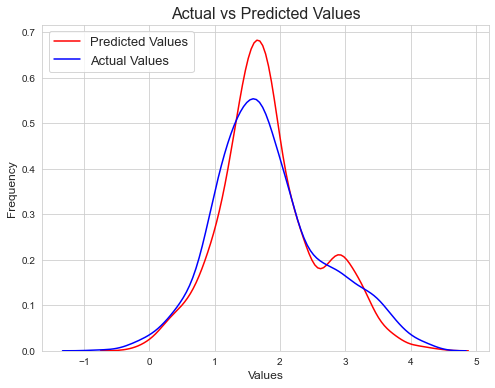

In [407]:
# Plot to check the accuracy of model

plt.figure(figsize=(8,6))
sns.distplot(pred, hist = False, color= 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)


### Observation on Final model

- Our intercept/constant is 2.02293648. This is the mean of our dependent variable (Price) before taking into account its relationships with the independent variables. 


- As expected, our coefficients vary from positive to negative values. Its values represents the average change in the dependent variable given a one unit change in the independent variables. That is, the dependent variable changes by the coefficient value for every unit change in the independent variable. A positive sign indicates that as the independent variable increases, the response variable also increases and vice versa. A negative sign indicates that as the independent variable increases, the response variable decreases and vice versa. For example, the coefficient value for Power_log is 0.51120499 which means that if Power_log increases by 1 unit, the dependent variable will increase by 0.51120499. 


- The Mean Absolute Error (MAE) is a measure of the average magnitude of error generated by the regression model. It is obtained by calculating the absolute difference between the model predictions and the observed values. A MAE of 0.28646457157024985 on test data tells us the average size of our residuals


- The Root Mean Squared Error is the standard deviation of our residuals. A RMSE of 0.3734987752713644 on test data provides an estimate of how large our models residuals are being dispersed


- R^2 is the percentage of variation of the dependent variable explained by the regression model. An R^2 value of 0.805 means that in this model, independent variables are able to explain approximately 81% of variances in dependent variable. 


- This model can still be improved given more information and knowledge on how to accurately cap outliers, dimensionality reduction to deal with multicollinearity to ensure information in key variables are not lost, more advanced missing value treatment etc


### Heteroskedacity  Test

* Heteroskedacity - This occurs when the errors/residuals are correlated with the independent variable. That is as the independent variable increases, residuals also increases/becomes dispersed. This should not be the case as residuals should have a constant variance. When heteroskedacity occurs, ot means there is more information not being extracted from the independent variables


How to test?
- We can test for this by using the goldfeldquandt test 
- By plotting residuals vs fitted values and checking the plot


Goldfeldquandt Test

Null hypothesis : Residuals are not Heteroskedactic 


Alternate hypothesis : Residuals are Heteroskedactic

Significance level = 0.05

if p-value is greater than the significance level, then our residuals are Homoskedastic. Alternatively, if p-value is less than the significance level, then our residuals are Heteroskedastic 
  

In [408]:
# Create DataFrame of Actual and Predicted values from our model

df_res = pd.DataFrame({'Actual':y_test.values.flatten(),'Predict': pred.flatten()})

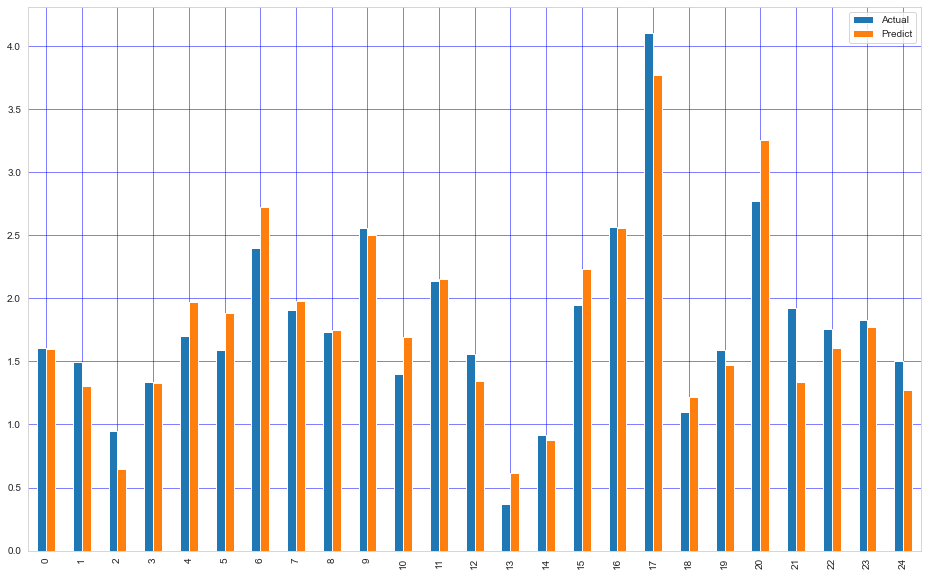

In [409]:
# Plot to compare Actual and Predicted values
df_res1 = df_res.head(25)
df_res1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [410]:
# Add new variable Residual to DataFrame
df_res['Residual'] = df_res.Actual - df_res.Predict
df_res

,Actual,Predict,Residual
0,1.609438,1.594933,0.014504
1,1.497388,1.307832,0.189557
2,0.947789,0.645110,0.302680
3,1.334475,1.326418,0.008057
4,1.701105,1.971237,-0.270132
...,...,...,...
2171,2.602690,2.495978,0.106712
2172,1.702928,2.151685,-0.448757
2173,1.226712,1.499608,-0.272895
2174,1.619388,1.726730,-0.107342


In [411]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

col = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_res['Residual'], X_test_final)
lzip(col, test)

[('F statistic', 1.1003950814515846), ('p-value', 0.060160105729310874)]

### Observation

Since p-value > 0.05 we can say that the residuals are homoscedastic.

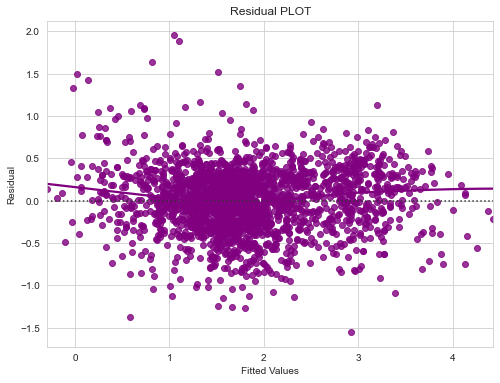

In [412]:
# Residual vs Fitted Plot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.residplot(df_res['Predict'],df_res['Residual'],color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### Test of Linearity of Variables

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to test?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption if not followed?**

* We can try to transform the variables and make the relationships linear

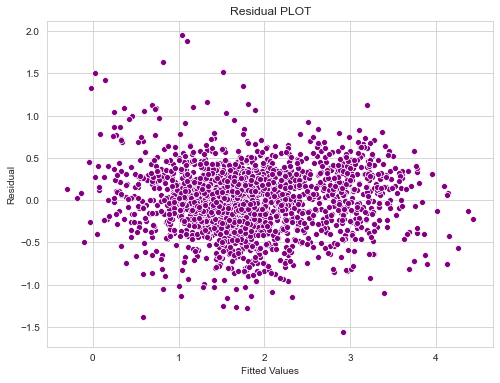

In [413]:
# Plot to check for Linearity
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(df_res['Predict'],df_res['Residual'],color="purple")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### Mean of residuals should be 0

The points on the residual vs predicted values plot should be randomly scattered around zero. Assuming that the residuals have a mean of zero is therefore realistic

In [414]:
np.mean(df_res['Residual'])

-0.0056902532485635015

### TEST FOR NORMALITY

* Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What if the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

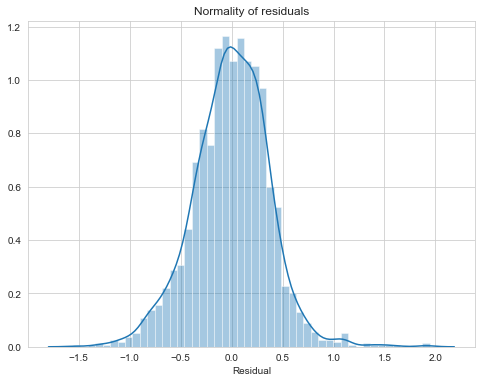

In [415]:
# Plot distribution of residuals
plt.figure(figsize=(8,6))
sns.distplot(df_res['Residual'])
plt.title('Normality of residuals')
plt.show()

In [416]:
### Convert Predictions back to normal from log-form

df_res['Actual_Price'] = round(np.exp(df_res['Actual']),3)
df_res['Price_Prediction'] = round(np.exp(df_res['Predict']),3)

df_res.head()

,Actual,Predict,Residual,Actual_Price,Price_Prediction
0,1.609438,1.594933,0.014504,5.000,4.928
1,1.497388,1.307832,0.189557,4.470,3.698
2,0.947789,0.645110,0.302680,2.580,1.906
3,1.334475,1.326418,0.008057,3.798,3.768
4,1.701105,1.971237,-0.270132,5.480,7.180


### Linear Regression Model Assumptions Observations

#### Multicollinearity

The following dependent variables had major multi-collinearity issues

- Engine_log and Power_log: As earlier stated, there is a strong linear relationship between Engine and Power. The higher the displacement volume of the engine, the higher the maximum power the engine can generate. Which means, the bigger the engine, the more powerful the car. 


- Manufacturing_Period_2010's and New_Mileage: From our EDA, we also picked up on this point that vehicles manufactured in 2010 have a linear relationship with Mileage that is, vehicles manufactured more recently have high mileage

One of each had to be dropped to prevent the multi-collinearity issues


#### Heteroskedacity

To confirm if our residuals were Heteroskedactic or Homoskedastic the Goldfeldquandt Test was carried out. The null and alternate hypothesis tested were: 

- Null hypothesis : Residuals are not Heteroskedactic 


- Alternate hypothesis : Residuals are Heteroskedactic

Our model produced residuals with a P-Value of 0.060160105729310874 which led to us failing to reject the null hypothesis confirming that our models residuals are not Heteroskedastic 


What this means is that our residuals are not correlated with our independent variables that is, our residuals have a constant variance

#### Linearity

Our fitted vs residual plot shows that our data points do not follow any specific pattern which means that our model is linear.

#### Mean of Residuals

The mean of our residuals is -0.0056902532485635015 which is somewhat close to a zero mean residual

#### Normal Distribution

Our residuals have a normal-like distribution. Meaning that it is close to normal but not perfectly normal. This suggests that there are some unusual datapoints causing the slight abnormality


### 2.8 Conclusion

Price is a very important factor companies like Cars4U should be thinking about. It is known that a slight increase in price can have a huge impact on the bottom line both positively and negatively as such, knowing exactly how to set prices and what prices to set on their used cars will put them in a great position to maximize their revenue. 

This model is beneficial to Cars4U because it allows the company employ a dynamic pricing strategy. When applied correctly, dynamic pricing has several key benefits, such as maximized profits and revenue growth. Prices can be used to manage demand against supply and differentiated to better represent customer willingness to pay. 

Automating the pricing process means that the company can react to market changes such as customer buying behavior in real time. It can also allow the company adjust pricing based on various situations or circumstances. This method is called differential pricing. To employ this strategy, Cars4U must be able to identify their different market segments. For example they could segment their customers according brand preference, Engine, power and Mileage requirements, location etc and using the model to set optimal prices per segment

Cars4U can differentiate themselves significantly by employing this pricing model. By knowing the right price to sell at to the right customer at the right time, the company can impprove its profits significantly